# Repaso



## Arreglos

In [140]:
from datascience import *
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [141]:
make_array(1, 2,2, 3 )

array([1, 2, 2, 3])

In [142]:
q = make_array("hola", "mundo")

# Rangos

Enfatizar en la diferencia entre diferentes tipos de datos y los rangos

In [143]:
u = np.arange(5)
u

array([0, 1, 2, 3, 4])

In [144]:
u.take(2)

2

## Leibniz's Formula for Pi

La fórmula de Leibniz para calcular $\pi$ es una serie infinita alternada que converge hacia $\pi$ cuando se multiplica por 4. Se puede expresar de la siguiente manera:

\begin{equation}
\frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \frac{1}{11} + \cdots
\end{equation}

También se puede reorganizar la fórmula separando los términos positivos y negativos en dos series distintas:

\begin{equation}
\frac{\pi}{4} = \left( 1 + \frac{1}{5} + \frac{1}{9} + \cdots \right) - \left( \frac{1}{3} + \frac{1}{7} + \frac{1}{11} + \cdots \right)
\end{equation}

Esta fórmula es una representación elegante de $\pi$,  aunque su convergencia es relativamente lenta.

¿Calcular el valor de pi?

In [145]:
N = 1000
T1 = 1/np.arange(1, N, 4)
T2 = 1/np.arange(3, N, 4)
pi = 4*(np.sum(T1)-np.sum(T2))

valor_esperado = np.pi

error_absoluto = abs(np.pi-pi)
error_relativo = error_absoluto*100/np.pi

print("---------------------------------------------------------------------------------")
print(f"El valor de pi es {pi:.3f}, cálculado con {N} términos y el error es de {error_absoluto:.3f}")
print(f"El error absoluto es :{error_relativo:.3f}")
print("---------------------------------------------------------------------------------")


---------------------------------------------------------------------------------
El valor de pi es 3.140, cálculado con 1000 términos y el error es de 0.002
El error absoluto es :0.064
---------------------------------------------------------------------------------


# Tablas

| **Método**                                  | **Descripción**                                                                 |
|---------------------------------------------|---------------------------------------------------------------------------------|
| `Table.read_table(file_path)`               | Lee un archivo CSV y devuelve una tabla.                                        |
| `table.show(n)`                             | Muestra las primeras `n` filas de la tabla.                                     |
| `table.with_columns(column1, values1, ...)` | Agrega una o más columnas nuevas a la tabla.                                    |
| `table.column(column_name)`                 | Devuelve los valores de una columna como un array de Numpy.                     |
| `table.num_columns()`                       | Devuelve el número de columnas en la tabla.                                     |
| `table.num_rows()`                          | Devuelve el número de filas en la tabla.                                        |
| `table.select(column_name1, column_name2)`  | Selecciona y devuelve una tabla con solo las columnas indicadas.                |
| `table.drop(column_name1, column_name2)`    | Elimina las columnas especificadas y devuelve una tabla nueva.                  |
| `table.where(column_name, predicate)`       | Filtra las filas según una condición en una columna específica.                 |
| `table.sort(column_name, descending=False)` | Ordena la tabla por una columna en orden ascendente o descendente.              |


## Construcción de tablas desde cero

In [146]:
tabla_periodica = Table().with_columns( ["temperatura", ["Si", "K", "Fe", "Co"], "NumeroAtomico", [14,19,26,27] ])
tabla_periodica.take(range(1, 2))

temperatura | NumeroAtomico
K           | 19

In [147]:
tabla_periodica

temperatura | NumeroAtomico
Si          | 14
K           | 19
Fe          | 26
Co          | 27

In [148]:
tabla_periodica.select("NumeroAtomico")
# tipo tabla 

NumeroAtomico
14
19
26
27

In [149]:
tabla_periodica.column("NumeroAtomico")
# Tipo array 

array([14, 19, 26, 27])

## Creacion de una tabla 
Supongamos que queremos construir una tabla con las distancia al sol,  y la masa de cada planeta.

| Planeta    | Distancia al Sol (UA) | Masa (Unidades de masas terrestres) |
|------------|-----------------------|-------------------------------------|
| Mercurio   | 0.39                  | 0.055                              |
| Venus      | 0.72                  | 0.815                              |
| Tierra     | 1.00                  | 1.000                              |
| Marte      | 1.52                  | 0.107                              |
| Júpiter    | 5.20                  | 317.8                              |
| Saturno    | 9.58                  | 95.2                               |
| Urano      | 19.22                 | 14.5                               |
| Neptuno    | 30.05                 | 17.1                               |

Nota:  
- 1 UA ≈ 149.6 millones de kilómetros
- 5.97 × 10²⁴ kilogramos.

Las siguientes celdas contiene la informaciòn par no copiar todos los datos: 

```python 
distancias_ua = [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05]
```

```python 
masas_terrestres = [0.055, 0.815, 1.000, 0.107, 317.8, 95.2, 14.5, 17.1]
```

In [150]:
# Construyendo la tabla
Table().with_columns(["Planeta", ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"],
                      "DistanciaSol", [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05],
                      "Masa", [0.055, 0.815, 1.000, 0.107, 317.8, 95.2, 14.5, 17.1],                     
                     ])


Planeta  | DistanciaSol | Masa
Mercurio | 0.39         | 0.055
Venus    | 0.72         | 0.815
Tierra   | 1            | 1
Marte    | 1.52         | 0.107
Júpiter  | 5.2          | 317.8
Saturno  | 9.58         | 95.2
Urano    | 19.22        | 14.5
Neptuno  | 30.05        | 17.1

In [151]:
# Almacenado la tabla en una variable
planetas=Table().with_columns(["Nombre", ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"],
                      "DistanciaSol", [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05],
                      "Masa", [0.39, 0.72, 1.00, 1.52, 5.20, 9.58, 19.22, 30.05],                     
                     ])

## table.take
## table.show

In [152]:
planetas.take(1)

Nombre | DistanciaSol | Masa
Venus  | 0.72         | 0.72

In [153]:
planetas.select("Nombre")

Nombre
Mercurio
Venus
Tierra
Marte
Júpiter
Saturno
Urano
Neptuno

In [154]:
planetas.labels

('Nombre', 'DistanciaSol', 'Masa')

In [155]:
planetas.rows

Rows(Nombre   | DistanciaSol | Masa
Mercurio | 0.39         | 0.39
Venus    | 0.72         | 0.72
Tierra   | 1            | 1
Marte    | 1.52         | 1.52
Júpiter  | 5.2          | 5.2
Saturno  | 9.58         | 9.58
Urano    | 19.22        | 19.22
Neptuno  | 30.05        | 30.05)

In [156]:
len(planetas)

3

In [157]:
planetas.sort("Masa", descending=False)

Nombre   | DistanciaSol | Masa
Mercurio | 0.39         | 0.39
Venus    | 0.72         | 0.72
Tierra   | 1            | 1
Marte    | 1.52         | 1.52
Júpiter  | 5.2          | 5.2
Saturno  | 9.58         | 9.58
Urano    | 19.22        | 19.22
Neptuno  | 30.05        | 30.05

In [158]:
planetas.drop("Masa")

Nombre   | DistanciaSol
Mercurio | 0.39
Venus    | 0.72
Tierra   | 1
Marte    | 1.52
Júpiter  | 5.2
Saturno  | 9.58
Urano    | 19.22
Neptuno  | 30.05

# Lectura de tablas

1. Muestra los 10 primeros valores de la tabla

2. Selecciona las columnas "Animal" y "Velocidad Promedio (km/h)"

3. Determina el animal que tiene mayor peso


In [159]:
animals = Table().read_table("Animales.csv", sep=",")
animals

Unnamed: 0 | Animal                     | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
0          | Cerdo Hormiguero           | 117.5       | 52.5      | 40
1          | Lobo Terrícola             | 45          | 11        | 27
2          | Elefante Africano          | 290         | 4350      | 25
3          | León Africano              | 95          | 185       | 58
4          | Perro Salvaje Africano     | 77.5        | 27        | 56
5          | Íbice Alpino               | 84          | 69.5      | 60
6          | Rana de la Selva Amazónica | 7.5         | 0         | 0.55
7          | Bisonte Americano          | 169         | nan       | 48
8          | Oso Hormiguero             | 71.5        | 31.5      | 24
9          | Caballo Árabe              | 150         | 690       | 65
... (168 rows omitted)

In [160]:
animales = animals.drop("Unnamed: 0")
animales

Animal                     | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Cerdo Hormiguero           | 117.5       | 52.5      | 40
Lobo Terrícola             | 45          | 11        | 27
Elefante Africano          | 290         | 4350      | 25
León Africano              | 95          | 185       | 58
Perro Salvaje Africano     | 77.5        | 27        | 56
Íbice Alpino               | 84          | 69.5      | 60
Rana de la Selva Amazónica | 7.5         | 0         | 0.55
Bisonte Americano          | 169         | nan       | 48
Oso Hormiguero             | 71.5        | 31.5      | 24
Caballo Árabe              | 150         | 690       | 65
... (168 rows omitted)

# Operacion sobre tablas


## Predicados

| Predicado                     | Descripción                                                  |
| ------------------------------| ------------------------------------------------------------ |
| `are.equal_to(Z)`              | Igual a Z                                                    |
| `are.above(x)`                 | Mayor que x                                                  |
| `are.above_or_equal_to(x)`     | Mayor o igual a x                                            |
| `are.below(x)`                 | Menor que x                                                  |
| `are.below_or_equal_to(x)`     | Menor o igual a x                                            |
| `are.between(x, y)`            | Mayor o igual a x y menor que y                              |
| `are.strictly_between(x, y)`   | Mayor que x y menor que y                                    |
| `are.between_or_equal_to(x, y)`| Mayor o igual a x y menor o igual a y                        |
| `are.containing(S)`            | Contiene la cadena de texto S                                |

## Predicados Negados

Puedes especificar la negación de cualquiera de estas condiciones utilizando `.not_` antes del predicado:

| Predicado Negado               | Descripción                                                  |
| ------------------------------| ------------------------------------------------------------ |
| `are.not_equal_to(Z)`          | No igual a Z                                                 |
| `are.not_above(x)`             | No mayor que x                                               |


In [161]:
animales.where("Altura (cm)", are.above(100))

Animal                       | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Cerdo Hormiguero             | 117.5       | 52.5      | 40
Elefante Africano            | 290         | 4350      | 25
Bisonte Americano            | 169         | nan       | 48
Caballo Árabe                | 150         | 690       | 65
Arowana                      | 120         | 6         | 24
Elefante Asiático            | 250         | 3500      | 40
Delfín Moteado del Atlántico | 225         | 130       | 52
Foca de Pelo Australiana     | 136         | 29        | 32
Tiburón Peregrino            | 1100        | 550       | 21
Rinoceronte Negro            | 156         | nan       | 56
... (56 rows omitted)

In [162]:
animales.where('Velocidad Promedio (km/h)', are.equal_to(48))

Animal            | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Bisonte Americano | 169         | nan       | 48
Tapir de Baird    | 91.5        | 275       | 48
Oso Pardo         | 95          | 425       | 48
Zorro Rojo        | 42.5        | 5         | 48
Tapir             | 95          | 275       | 48

In [163]:
animales.where('Velocidad Promedio (km/h)', are.between(40,50))

Animal                | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Cerdo Hormiguero      | 117.5       | 52.5      | 40
Bisonte Americano     | 169         | nan       | 48
Elefante Asiático     | 250         | 3500      | 40
Frailecillo Atlántico | 27.5        | 560       | 40
Tapir de Baird        | 91.5        | 275       | 48
Zorro de Bengala      | 37.5        | 3.25      | 40
Ballena Azul          | 33          | 200       | 40
Oso Pardo             | 95          | 425       | 48
Chimpancé             | 160         | 48        | 40
Perro Dálmata         | 55.5        | 27.5      | 42.5
... (25 rows omitted)

In [164]:
animales.where('Velocidad Promedio (km/h)', are.between(40,50)).sort("Velocidad Promedio (km/h)", descending=True)

Animal                  | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Avispón Gigante Japonés | 45          | 6         | 49
Bisonte Americano       | 169         | nan       | 48
Tapir de Baird          | 91.5        | 275       | 48
Oso Pardo               | 95          | 425       | 48
Zorro Rojo              | 42.5        | 5         | 48
Tapir                   | 95          | 275       | 48
Ñu                      | 210         | 295       | 47
Fosa                    | 80          | 6.5       | 46.5
Zorro Volador           | 40          | 1         | 45
Narval                  | 500         | 1600      | 45
... (25 rows omitted)

In [165]:
animales.where('Animal', are.containing('Tiburón'))

Animal                      | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Tiburón Peregrino           | 1100        | 550       | 21
Tiburón Duende              | 320         | 210       | 2.3
Tiburón Blanco              | 610         | 2268      | 56
Tiburón Blanco              | 670         | 2268      | 56
Tiburón Mako de Aleta Corta | 394         | 800       | 45
Tiburón Ballena             | 1800        | 1500      | 70
Tiburón Cebra               | 330         | 32        | 20

In [166]:
animales.sort("Velocidad Promedio (km/h)", descending = True)

Animal                   | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
Águila Calva             | 86          | 4.5       | 120
Guepardo                 | 80          | 46        | 112
Berrendo                 | 92.5        | 55        | 88.5
Búho Nival               | 61.5        | 2.45      | 80
Lince Ibérico            | 65          | 11.5      | 75
Camarón Mantis Pavo Real | 18          | 0         | 72
Tiburón Ballena          | 1800        | 1500      | 70
Caballo Árabe            | 150         | 690       | 65
Tigre de Bengala         | 100         | 240       | 65
Perro Bóxer              | 58          | 28.5      | 64
... (168 rows omitted)

Tarea : Encontrar los osos cuya peso sea mayor a 100Kg

# Operacion Groub by:

In [167]:
frutas = Table().with_columns("Color", ["Rojo", "Verde", "Verde", "Rojo", "Naranja"], 
                     "Tipo",["Manzana", "Pera", "Uvas", "Manzana", "Mandarina"] ,
                    "Precio",[200, 300, 400, 500, 600])

In [168]:
frutas.group("Color")

Color   | count
Naranja | 1
Rojo    | 2
Verde   | 2

### Elementos quimicos 


In [169]:
elementos = Table().with_columns(
    'Nombre', ['Hidrógeno', 'Helio', 'Litio', 'Berilio', 'Boro', 'Carbono', 'Nitrógeno', 'Oxígeno', 'Flúor', 'Neón',
               'Sodio', 'Magnesio', 'Aluminio', 'Silicio', 'Fósforo', 'Azufre', 'Cloro', 'Argón', 'Potasio', 'Calcio',
               'Escandio', 'Titanio', 'Vanadio', 'Cromo', 'Manganeso', 'Hierro', 'Cobalto', 'Níquel', 'Cobre', 'Zinc'],
    'Símbolo', ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
                'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca',
                'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn'],
    'Número Atómico', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                       21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Masa Atómica', [1.008, 4.0026, 6.94, 9.0122, 10.81, 12.011, 14.007, 15.999, 18.998, 20.180,
                     22.990, 24.305, 26.982, 28.085, 30.974, 32.06, 35.45, 39.948, 39.098, 40.078,
                     44.956, 47.867, 50.942, 51.996, 54.938, 55.845, 58.933, 58.693, 63.546, 65.38],
    'Categoría', ['No metal', 'Gas noble', 'Metal alcalino', 'Metal alcalinotérreo', 'Metaloide', 'No metal', 'No metal', 'No metal', 'No metal', 'Gas noble',
                  'Metal alcalino', 'Metal alcalinotérreo', 'Metal', 'Metaloide', 'No metal', 'No metal', 'No metal', 'Gas noble', 'Metal alcalino', 'Metal alcalinotérreo',
                  'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición', 'Metal de transición']
)


Determinar el numero de elementos cuya masa es menor a 15

In [170]:
elementos

Nombre    | Símbolo | Número Atómico | Masa Atómica | Categoría
Hidrógeno | H       | 1              | 1.008        | No metal
Helio     | He      | 2              | 4.0026       | Gas noble
Litio     | Li      | 3              | 6.94         | Metal alcalino
Berilio   | Be      | 4              | 9.0122       | Metal alcalinotérreo
Boro      | B       | 5              | 10.81        | Metaloide
Carbono   | C       | 6              | 12.011       | No metal
Nitrógeno | N       | 7              | 14.007       | No metal
Oxígeno   | O       | 8              | 15.999       | No metal
Flúor     | F       | 9              | 18.998       | No metal
Neón      | Ne      | 10             | 20.18        | Gas noble
... (20 rows omitted)

In [171]:
# Agrupar por la columna 'Nombre' y contar las ocurrencias
conteo_nombres = elementos.group('Nombre')
# Filtrar aquellos nombres que aparecen solo una vez
nombres_unicos = conteo_nombres.where('count', 1)
# Mostrar los nombres únicos
nombres_unicos.show()

In [172]:
arboles = Table().read_table("arboles_udea_localizacion.csv")

In [173]:
arboles.where("Nombre común", are.containing("Falso")).column("ALTURA TOTAL")

array([ 24. ,  25. ,  24. ,  25. ,  27. ,  26. ,  26. ,   9.5,  25. ,
         9. ,  21. ,  26. ,  24. ,  22. ,  21. ,  22. ,  23. ,  23. ,
        24. ,  20. ,  20. ,  20. ,  18. ,  22. ,  21. ,  20. ,  19. ,
        21. ,  20. ,  22. ,  19. ,  18. ,  18. ,  21. ,  21. ,  14. ,
        20. ,  17. ,  18. ,  21. ,  18. ,  13. ,   7.3,  20. ,  14. ,
         1.4,  23. ,  23. ,  23. ,  20. ,  21. ,   9.1,  20. ,   9.5,
        11.7,  18. ,  11. ,  11. ,  10. ,  17. ,  15.2,  18. ,  14. ,
        25. ,  12. ,  27. ,  23. ,  24. ,  12. ,  10.5,  18. ,   7.6,
        19.5,   7.5,  10. ,   8. ,  10. ])

In [174]:
arboles.where("ALTURA TOTAL", are.contained_in(make_array(24., 25.,)))

Unnamed: 0 | FAMILIA   | Nombre común    | Nombre científico | X       | Y        | NUMERO DE TALLOS | CAP_1 | CAP_2 | CAP_3 | CAP_4 | CAP_5 | SUMATORIA CAP | ALTURA TOTAL | ALTURA DE COPA | DIAMETRO_MAYOR  | DIAMETRO_MENOR | ORIENTACIÒN DE COPA (Punto Cardinal)
0          | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.2691  | -75.5665 | 1                | 522.5 | nan   | nan   | nan   | nan   | 522.5         | 24           | 7.5            | 42.6            | 38.5           | Este -oeste
3          | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.26891 | -75.5666 | 1                | 481.5 | nan   | nan   | nan   | nan   | 481.5         | 25           | 10             | 45.8            | 36.4           | Este -oeste
4          | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.26881 | -75.5666 | 1                | 523.8 | nan   | nan   | nan   | nan   | 523.8         | 24           | 4              | 34.4            | 26.5           | Este -oeste
7          | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.2686  | -75.5666 | 1                | 495.5 | nan   | nan   | nan   | nan   | 495.5         | 25           | 8              | 35.2            | 28.9           | Norte-sur
18         | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.26798 | -75.5668 | 1                | 517.8 | nan   | nan   | nan   | nan   | 517.8         | 25           | 8              | 45.6            | 34.9           | Norte-sur
32         | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.26697 | -75.5671 | 1                | 610   | nan   | nan   | nan   | nan   | 610           | 24           | 11             | 36.25           | 30.6           | Norte-sur
69         | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.2658  | -75.5674 | 1                | 417.9 | nan   | nan   | nan   | nan   | 417.9         | 24           | 4              | 20.5            | 18.9           | Este -oeste
1641       | ARECACEAE | Palma sancona   | Syagrus sancona   | 6.26745 | -75.5682 | 1                | 98.5  | nan   | nan   | nan   | nan   | 98.5          | 24           | 18             | 10.5            | 9.3            | Norte-sur
1653       | MORACEAE  | Falso laurel    | Ficus benjamina   | 6.26737 | -75.5686 | 1                | 673.6 | nan   | nan   | nan   | nan   | 673.6         | 25           | 8              | 38.5            | 30.9           | Norte-sur
1784       | FABACEAE  | Carbonero zorro | Cojoba arboricola | 6.2655  | -75.5679 | 3                | 276.4 | 110.3 | 149.5 | nan   | nan   | 536.2         | 24           | 12             | 13              | 10             | Norte-sur
... (4 rows omitted)

In [175]:
arboles.take(2, 10)

Unnamed: 0 | FAMILIA  | Nombre común  | Nombre científico      | X       | Y        | NUMERO DE TALLOS | CAP_1 | CAP_2 | CAP_3 | CAP_4 | CAP_5 | SUMATORIA CAP | ALTURA TOTAL | ALTURA DE COPA | DIAMETRO_MAYOR  | DIAMETRO_MENOR | ORIENTACIÒN DE COPA (Punto Cardinal)
2          | FABACEAE | Carbonero (2) | Calliandra pittieri    | 6.26898 | -75.5666 | 1                | 80.3  | nan   | nan   | nan   | nan   | 80.3          | 4.8          | 1.8            | 14.5            | 10.3           | Norte-sur
10         | FABACEAE | Gualanday     | Jacaranda mimosifolia  | 6.26835 | -75.5667 | 2                | 85.5  | 83    | nan   | nan   | nan   | 168.5         | 8            | 2.1            | 15.2            | 14.3           | Norte-sur

In [176]:
arboles.sort("ALTURA TOTAL", descending=True)

Unnamed: 0 | FAMILIA       | Nombre común    | Nombre científico | X       | Y        | NUMERO DE TALLOS | CAP_1 | CAP_2 | CAP_3 | CAP_4 | CAP_5 | SUMATORIA CAP | ALTURA TOTAL | ALTURA DE COPA | DIAMETRO_MAYOR  | DIAMETRO_MENOR | ORIENTACIÒN DE COPA (Punto Cardinal)
1113       | ANACARDIACEAE | Mango           | Mangifera indica  | 6.26871 | -75.5701 | 1                | 2222  | nan   | nan   | nan   | nan   | 2222          | 2222         | 2222           | 2222            | 2222           | Norte-sur
8          | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26842 | -75.5667 | 1                | 604.5 | nan   | nan   | nan   | nan   | 604.5         | 27           | 9              | 41.6            | 36.4           | Norte-sur
1941       | MALVACEAE     | Ceiba pentandra | Ceiba pentandra   | 6.26575 | -75.5688 | 1                | 467.1 | nan   | nan   | nan   | nan   | 467.1         | 27           | 12             | 12              | 7              | Oeste-oeste
1998       | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26575 | -75.5693 | 1                | 840.6 | nan   | nan   | nan   | nan   | 840.6         | 27           | 5.6            | 38.5            | 27.8           | Norte-sur
12         | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26832 | -75.5667 | 1                | 451.2 | nan   | nan   | nan   | nan   | 451.2         | 26           | 4              | 35.2            | 28.4           | Norte-sur
15         | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26817 | -75.5667 | 1                | 512.2 | nan   | nan   | nan   | nan   | 512.2         | 26           | 9              | 32.25           | 28.6           | Norte -sur
27         | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26716 | -75.567  | 1                | 478.2 | nan   | nan   | nan   | nan   | 478.2         | 26           | 7.5            | 32.15           | 25.6           | Este -oeste
3          | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26891 | -75.5666 | 1                | 481.5 | nan   | nan   | nan   | nan   | 481.5         | 25           | 10             | 45.8            | 36.4           | Este -oeste
7          | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.2686  | -75.5666 | 1                | 495.5 | nan   | nan   | nan   | nan   | 495.5         | 25           | 8              | 35.2            | 28.9           | Norte-sur
18         | MORACEAE      | Falso laurel    | Ficus benjamina   | 6.26798 | -75.5668 | 1                | 517.8 | nan   | nan   | nan   | nan   | 517.8         | 25           | 8              | 45.6            | 34.9           | Norte-sur
... (2647 rows omitted)

X       | Y
6.2691  | -75.5665
6.26902 | -75.5665
6.26898 | -75.5666
6.26891 | -75.5666
6.26881 | -75.5666
6.26869 | -75.5666
6.2687  | -75.5667
6.2686  | -75.5666
6.26842 | -75.5667
6.2684  | -75.5667
... (2647 rows omitted)

In [209]:
scaled = arboles.with_columns(
    'labels', arboles.column('FAMILIA'),
    'colors', 'green',   # aquí puedes usar un solo color o un dict por familia
    'areas', 10 * arboles.column('ALTURA TOTAL')  # escala proporcional a la altura
).select('X', 'Y', 'labels', 'colors', 'areas')

# Generar el mapa
Circle.map_table(scaled, radius_in_meters=5)

---------------------------

# Gráficas

# Gráficos de dispersión

In [111]:
import numpy as np
from  datascience import *
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

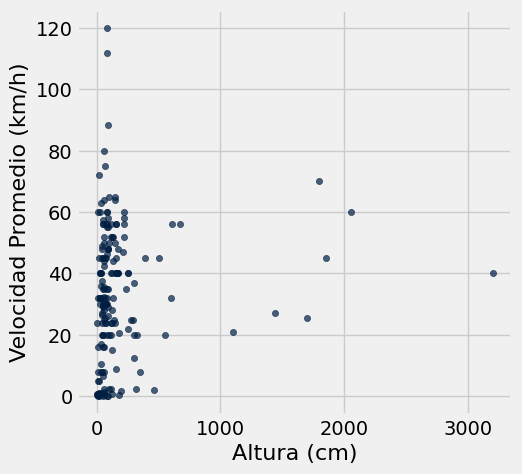

In [112]:
animals.scatter("Altura (cm)", "Velocidad Promedio (km/h)")

Realizar un grafico tipo scatter para los animales que tiene una altura menor a 1000 cm y comparar con su velocidad promedio

In [113]:
nuevos_animales = animals.where("Altura (cm)", are.between(0,100))
nuevos_animales

Unnamed: 0 | Animal                     | Altura (cm) | Peso (kg) | Velocidad Promedio (km/h)
1          | Lobo Terrícola             | 45          | 11        | 27
3          | León Africano              | 95          | 185       | 58
4          | Perro Salvaje Africano     | 77.5        | 27        | 56
5          | Íbice Alpino               | 84          | 69.5      | 60
6          | Rana de la Selva Amazónica | 7.5         | 0         | 0.55
8          | Oso Hormiguero             | 71.5        | 31.5      | 24
10         | Órix Árabe                 | 80          | 77.5      | 55
11         | Zorro Ártico               | 27.5        | 5.75      | 60
14         | Frailecillo Atlántico      | 27.5        | 560       | 40
17         | Ajolote                    | 30          | 300       | 0.8
... (100 rows omitted)

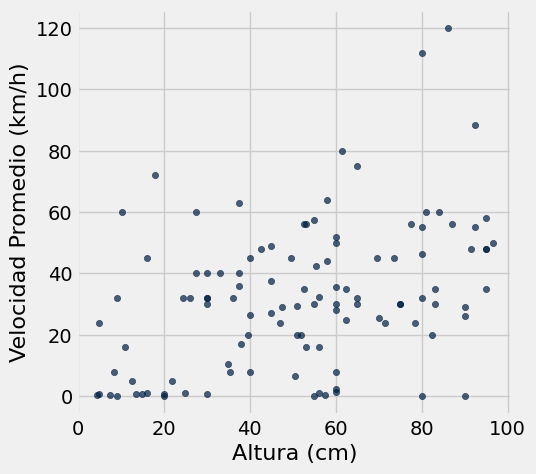

In [114]:
nuevos_animales.scatter("Altura (cm)", "Velocidad Promedio (km/h)")

El siguiente data set contiene la siguiente informacion: 

Year (Año):
Representa el año en el que se recopilan los datos.

Total Gross (Recaudación Total):
Es el total de ingresos generados por las películas lanzadas en ese año en millones de dolares. 

Number of Movies (Número de Películas):
Indica cuántas películas fueron lanzadas en ese año. Este número incluye todas las películas que se proyectaron en cines comerciales durante ese período.

#1 Movie (Película Número 1):
Muestra el título de la película que tuvo el mejor rendimiento en la taquilla durante ese año, es decir, la película con los ingresos más altos.

In [115]:
movies=Table().read_table("movies.csv")
movies

Unnamed: 0 | Year | Total Gross | Number of Movies | #1 Movie
0          | 2015 | 11128.5     | 702              | Star Wars: The Force Awakens
1          | 2014 | 10360.8     | 702              | American Sniper
2          | 2013 | 10923.6     | 688              | Catching Fire
3          | 2012 | 10837.4     | 667              | The Avengers
4          | 2011 | 10174.3     | 602              | Harry Potter / Deathly Hallows (P2)
5          | 2010 | 10565.6     | 536              | Toy Story 3
6          | 2009 | 10595.5     | 521              | Avatar
7          | 2008 | 9630.7      | 608              | The Dark Knight
8          | 2007 | 9663.8      | 631              | Spider-Man 3
9          | 2006 | 9209.5      | 608              | Dead Man's Chest
... (26 rows omitted)

# Gráficos de lineas

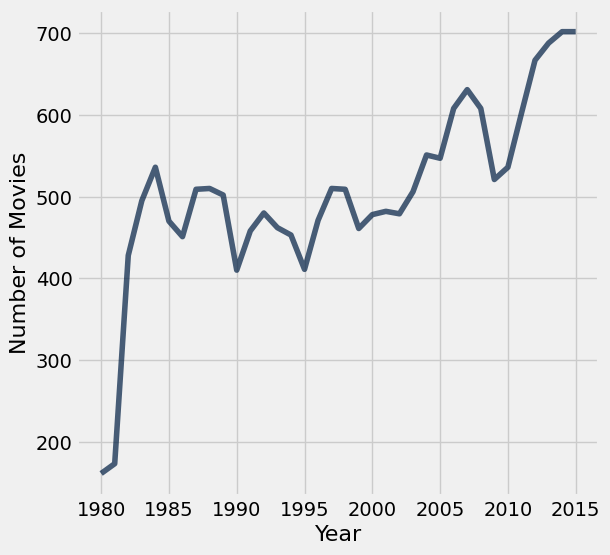

In [116]:
%matplotlib inline
plt.style.use('fivethirtyeight')
movies.plot('Year', 'Number of Movies')

In [117]:
century_21 = movies.where('Year', are.above(1999))

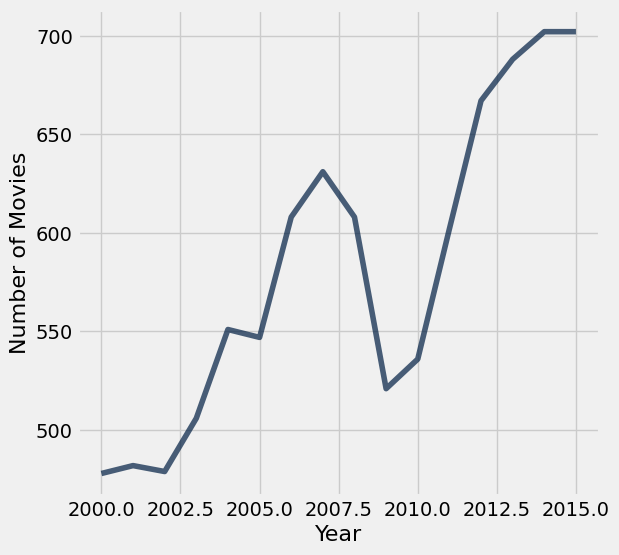

In [118]:
century_21.plot('Year', 'Number of Movies')

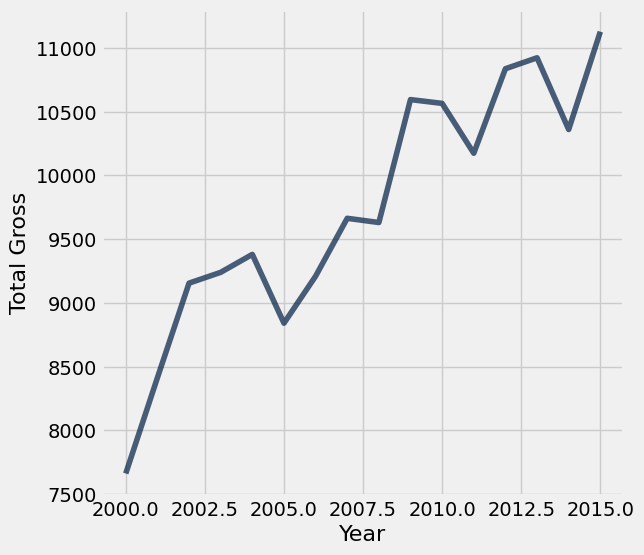

In [119]:
century_21.plot('Year', 'Total Gross')

# Variables categóricas

Una variable categórica es un tipo de variable que toma un conjunto limitado de valores posibles y cada uno de esos valores representa una categoría o un grupo. Estas variables no tienen un orden inherente, lo que significa que no se puede hacer una comparación natural entre sus valores (por ejemplo, no se puede decir que una categoría es "mayor" o "menor" que otra).

**Nominales:** Las categorías no tienen un orden específico. Ejemplos incluyen el color de un automóvil (rojo, azul, verde) o el tipo de comida (italiana, mexicana, china).

**Ordinales:** Las categorías tienen un orden lógico, pero la diferencia entre ellas no es medible o significativa. Ejemplo: nivel educativo (primaria, secundaria, universidad).


Ejemplo: 

    - Nominales:
    
        - Color de ojos 
        
        - Tipo de vehiculo
        
        - Estado civil 

    - Ordinales:
    
        - Talla de ropa: S, M, L XL
        
        - Grado escolar: primaria, secundaria, universitarios, posgrado
        


In [120]:
# Gráficas
import matplotlib.pylab as plt
%matplotlib inline

In [121]:
frutas = Table().with_columns("Fruta", ["Manzana", "Mangostino","Mandrono", "Uva", "Pera"], \
    "Color", ["Rojo", "Cafe Oscuro","Amarillo",  "Morado", "Verde"], \
    "Cantidad", make_array(10, 20, 10, 100,20)  )

In [122]:
frutas

Fruta      | Color       | Cantidad
Manzana    | Rojo        | 10
Mangostino | Cafe Oscuro | 20
Mandrono   | Amarillo    | 10
Uva        | Morado      | 100
Pera       | Verde       | 20

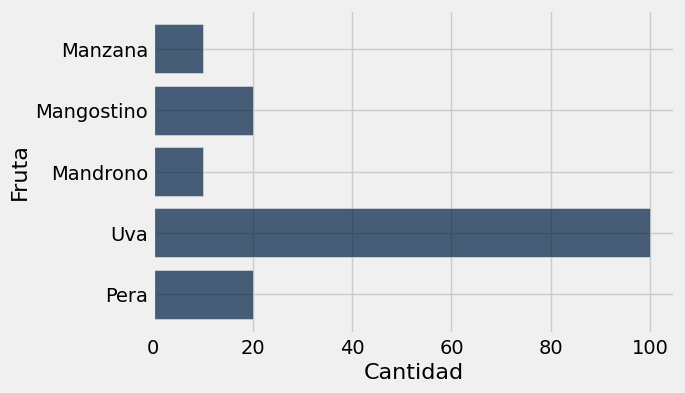

In [123]:
frutas.barh("Fruta", "Cantidad")

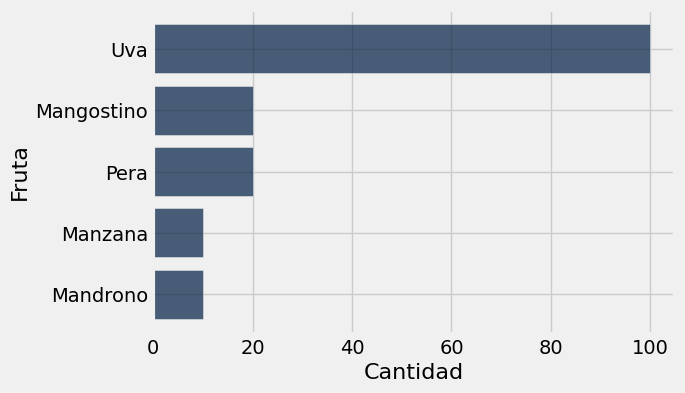

In [124]:
frutas.sort("Cantidad", descending = True).barh("Fruta", "Cantidad")

In [125]:
# Operacion group by: 

In [126]:
poblacion = Table().read_table("poblacion_mundial.csv")
poblacion

Unnamed: 0 | Rank | CCA3 | Country/Territory   | Capital          | Continent     | 2022 Population | 2020 Population | 2015 Population | 2010 Population | 2000 Population | 1990 Population | 1980 Population | 1970 Population | Area (km²) | Density (per km²) | Growth Rate | World Population Percentage
0          | 36   | AFG  | Afghanistan         | Kabul            | Asia          | 41128771        | 38972230        | 33753499        | 28189672        | 19542982        | 10694796        | 12486631        | 10752971        | 652230     | 63.0587           | 1.0257      | 0.52
1          | 138  | ALB  | Albania             | Tirana           | Europe        | 2842321         | 2866849         | 2882481         | 2913399         | 3182021         | 3295066         | 2941651         | 2324731         | 28748      | 98.8702           | 0.9957      | 0.04
2          | 34   | DZA  | Algeria             | Algiers          | Africa        | 44903225        | 43451666        | 39543154        | 35856344        | 30774621        | 25518074        | 18739378        | 13795915        | 2381741    | 18.8531           | 1.0164      | 0.56
3          | 213  | ASM  | American Samoa      | Pago Pago        | Oceania       | 44273           | 46189           | 51368           | 54849           | 58230           | 47818           | 32886           | 27075           | 199        | 222.477           | 0.9831      | 0
4          | 203  | AND  | Andorra             | Andorra la Vella | Europe        | 79824           | 77700           | 71746           | 71519           | 66097           | 53569           | 35611           | 19860           | 468        | 170.564           | 1.01        | 0
5          | 42   | AGO  | Angola              | Luanda           | Africa        | 35588987        | 33428485        | 28127721        | 23364185        | 16394062        | 11828638        | 8330047         | 6029700         | 1246700    | 28.5466           | 1.0315      | 0.45
6          | 224  | AIA  | Anguilla            | The Valley       | North America | 15857           | 15585           | 14525           | 13172           | 11047           | 8316            | 6560            | 6283            | 91         | 174.253           | 1.0066      | 0
7          | 201  | ATG  | Antigua and Barbuda | Saint John’s     | North America | 93763           | 92664           | 89941           | 85695           | 75055           | 63328           | 64888           | 64516           | 442        | 212.133           | 1.0058      | 0
8          | 33   | ARG  | Argentina           | Buenos Aires     | South America | 45510318        | 45036032        | 43257065        | 41100123        | 37070774        | 32637657        | 28024803        | 23842803        | 2780400    | 16.3683           | 1.0052      | 0.57
9          | 140  | ARM  | Armenia             | Yerevan          | Asia          | 2780469         | 2805608         | 2878595         | 2946293         | 3168523         | 3556539         | 3135123         | 2534377         | 29743      | 93.4831           | 0.9962      | 0.03
... (224 rows omitted)

Text(0, 0.5, 'Continente')

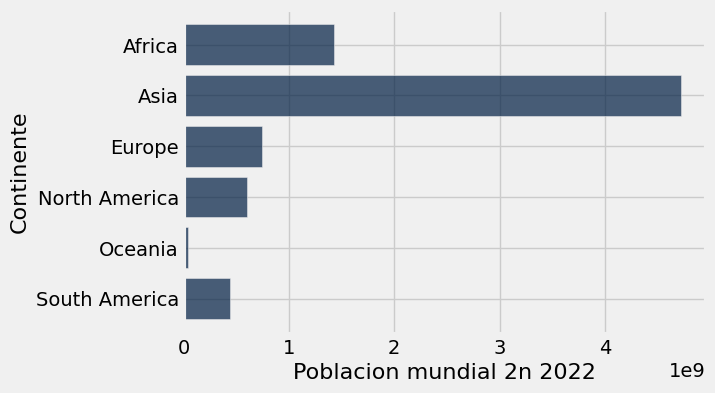

In [127]:
poblacion.group("Continent", sum).barh("Continent", "2022 Population sum")
plt.xlabel("Poblacion mundial 2n 2022")
plt.ylabel("Continente")

In [128]:
poblacion_continente = poblacion.group("Continent", sum)

In [129]:
pob_mundial = np.sum(poblacion_continente.column("2022 Population sum"))

In [130]:
print(f"Numero en notación científica {pob_mundial:.6e}")
print(f"Numero mostrado separado por comas {pob_mundial:,}")

Numero en notación científica 7.973413e+09
Numero mostrado separado por comas 7,973,413,042


# Cajas sobre los datos

In [131]:
altura = animales.column("Altura (cm)")
min(altura), max(altura)

(4.5, 3200.0)

In [132]:
animales.bin("Altura (cm)", bins=np.arange(4, 100,10))

bin  | Altura (cm) count
4    | 11
14   | 7
24   | 11
34   | 12
44   | 14
54   | 21
64   | 7
74   | 13
84   | 9
94   | 0

La anterior tabla muestra el conteo de animales, con los siguiente detalles 

- Entre [4, 14) hay 11 conteos

- Entre [14, 24) hay 7 conteos y asi sucecivamente
...



In [133]:
# Otra forma de realizarso seria
animales.bin("Altura (cm)", bins=11)

bin    | Altura (cm) count
4.5    | 158
295    | 10
585.5  | 3
876    | 1
1166.5 | 1
1457   | 1
1747.5 | 2
2038   | 1
2328.5 | 0
2619   | 0
... (2 rows omitted)

# Histograma

Un histograma es una representación gráfica que muestra la distribución de un conjunto de datos numéricos. Se utiliza para visualizar cómo se distribuyen los valores de una variable en diferentes rangos (llamados bins o intervalos). A diferencia de un gráfico de barras tradicional, donde las barras representan categorías, en un histograma las barras representan frecuencias de datos que caen dentro de cada bin.

## Características clave de un histograma:

- **Eje horizontal (x):** Representa los intervalos o bins, que agrupan los datos en rangos. Cada bin cubre un rango específico de valores numéricos.

- **Eje vertical (y):** Representa la frecuencia o el número de veces que los datos caen dentro de cada bin.
Barras: La altura de cada barra refleja la cantidad de observaciones que caen dentro del bin correspondiente.

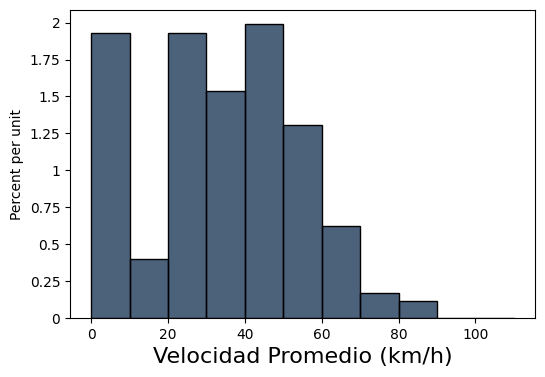

In [272]:
animales.hist("Velocidad Promedio (km/h)", bins=np.arange(0,120,10))

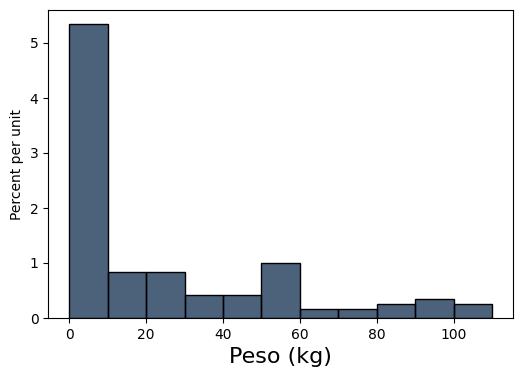

In [275]:
animales.hist("Peso (kg)", bins=np.arange(0,120,10))

# Principio del area.

El principio del área es una regla fundamental en la visualización de datos que establece que el tamaño de los elementos visuales en un gráfico debe ser proporcional a la cantidad de datos que representan. En otras palabras, el área de cualquier elemento gráfico, como barras, puntos o segmentos, debe reflejar con precisión el valor o la frecuencia de los datos que está representando.

## Aplicación en gráficos:

En un histograma, el área de cada barra es proporcional a la frecuencia o cantidad de datos en ese intervalo (bin).
En un gráfico de barras, la longitud de cada barra es proporcional al valor de la variable que representa.
En gráficos más complejos, como los diagramas de sectores o gráficos de burbujas, el área de los sectores o burbujas debe ser proporcional a los valores de los datos.


In [285]:
# Construir un histograma para la velocidad promedio
...

Los [histogramas]("https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html") siguen el principio del área y tienen dos propiedades:

- Las cajas se dibujan a escala y son contiguos (aunque algunos podrían estar vacíos), porque los valores en el eje horizontal son numéricos y, por lo tanto, tienen posiciones fijas en la línea numérica.

- El área de cada barra es proporcional al número de entradas en el contenedor.


`Area de la barra = Porcentaje de datos en el bin`

`Altura de la barra =  Area de la barra/Ancho del bin`

Las unidades del eje dependiente son : porcentaje por undidad en el eje horizontal, análogo a una densidad


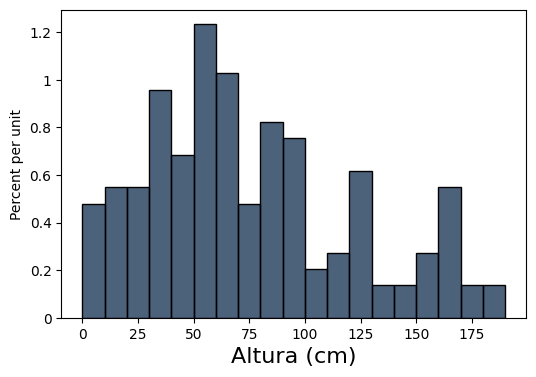

In [354]:
animales.hist("Altura (cm)", bins=np.arange(0,200,10))
#plt.ylabel("porcentaje por kg")

In [355]:
bins = np.arange(0,200,10)

In [360]:
np.sum(animales.bin("Altura (cm)", bins = bins).column("Altura (cm) count"))

146

In [363]:
animales.bin("Altura (cm)", bins = bins)

bin  | Altura (cm) count
0    | 7
10   | 8
20   | 8
30   | 14
40   | 10
50   | 18
60   | 15
70   | 7
80   | 12
90   | 11
... (10 rows omitted)

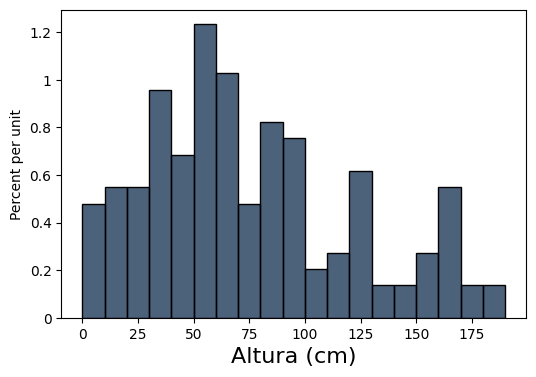

In [361]:
animales.hist("Altura (cm)", bins= np.arange(0,200,10))

In [375]:
Altura = (18./146)*100
#Altura/10
Altura

12.32876712328767

La altura de la barra de es de 12 dividida por 10 que es el tamano del bin

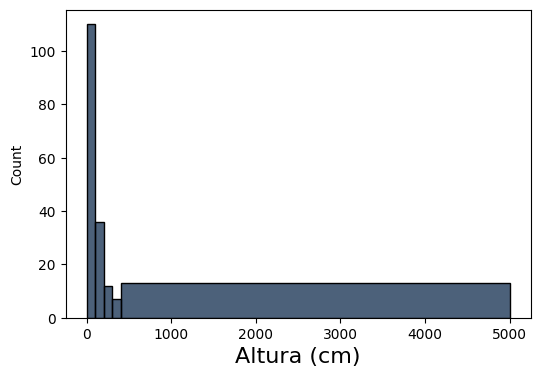

In [378]:
animales.hist("Altura (cm)", bins= make_array(0,100,200, 300, 400, 5000), normed=False)

In [379]:
animales.bin("Altura (cm)", bins = make_array(0,100,200, 300, 400, 5000))

bin  | Altura (cm) count
0    | 110
100  | 36
200  | 12
300  | 7
400  | 13
5000 | 0